In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

#!pip3 install fbprophet
#!pip install fbprophet
#!pip install pystan==2.19.1.1 --quiet
#!pip install fbprophet --quiet
#!pip install fbprophet
!pip install yfinance --quiet
!pip3 install pystan 
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pandas import read_csv
from datetime import datetime
	
df = pd.read_csv('/content/drive/MyDrive/dataAir_dindang.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
df 

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,27.1,70,1009.40,100.0,9.0
1,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,27.5,67,1009.40,120.0,4.0
2,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,28.2,66,1009.40,60.0,4.0
3,2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,29.3,64,1009.40,330.0,6.0
4,2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,46.0,0.5,25.33,20.4,45.73,16.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,55.0,0.6,41.57,25.2,66.77,19.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,57.0,0.5,21.73,24.7,46.45,20.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,80.0,0.9,35.39,38.3,73.66,32.0,30.0,62,1009.24,120.0,13.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1698 non-null   float64       
 2   co                1714 non-null   float64       
 3   no                1713 non-null   float64       
 4   no2               1713 non-null   float64       
 5   nox               1712 non-null   float64       
 6   pm25              1028 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


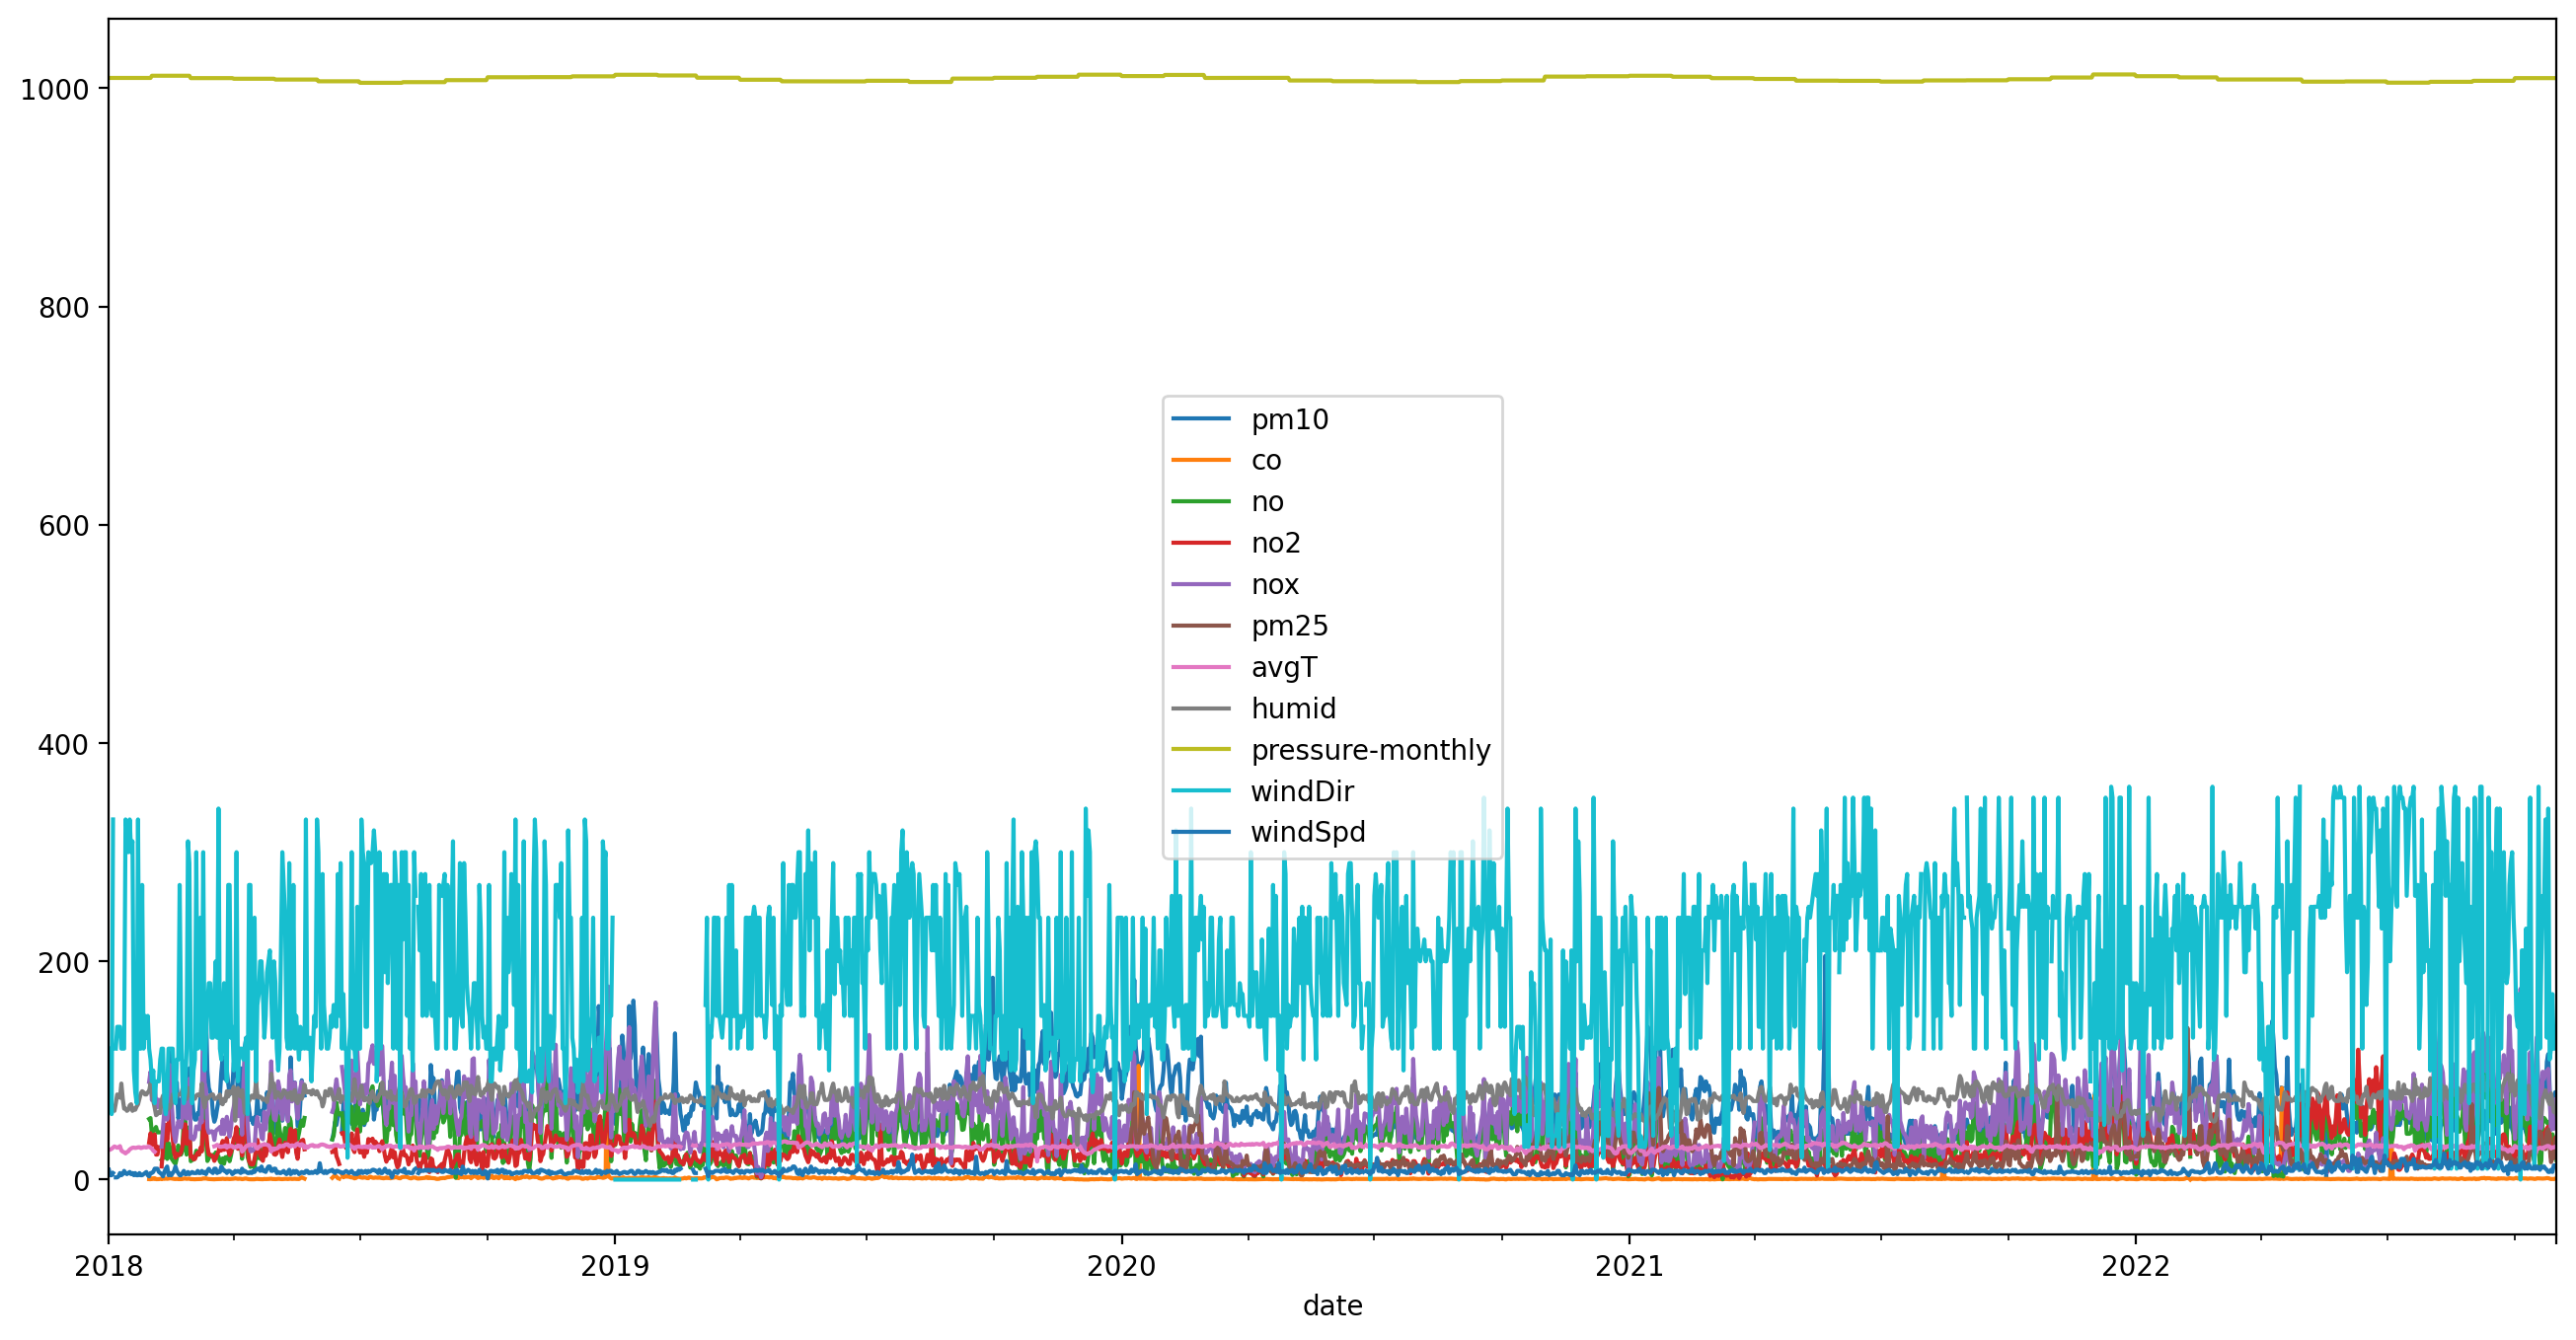

In [5]:
df.set_index('date').plot(figsize=(16, 8));

In [6]:
data = df.sort_values('date').reset_index(drop=True).copy()
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,27.1,70,1009.40,100.0,9.0
1,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,27.5,67,1009.40,120.0,4.0
2,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,28.2,66,1009.40,60.0,4.0
3,2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,29.3,64,1009.40,330.0,6.0
4,2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,46.0,0.5,25.33,20.4,45.73,16.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,55.0,0.6,41.57,25.2,66.77,19.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,57.0,0.5,21.73,24.7,46.45,20.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,80.0,0.9,35.39,38.3,73.66,32.0,30.0,62,1009.24,120.0,13.0


In [7]:
y_col = 'pm25'

In [8]:
data.dropna(subset=[y_col], inplace=True)
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
736,2020-01-07,140.0,1.09,21.66,34.04,55.70,33.0,30.8,63,1011.12,110.0,6.0
737,2020-01-08,118.0,0.93,26.20,31.36,57.55,47.0,30.5,69,1011.12,120.0,9.0
738,2020-01-09,137.0,1.37,73.71,42.93,116.34,49.0,30.8,68,1011.12,240.0,8.0
739,2020-01-10,183.0,1.45,57.53,55.32,112.85,80.0,30.6,69,1011.12,120.0,8.0
740,2020-01-11,123.0,0.67,6.79,26.72,33.51,43.0,29.8,80,1011.12,160.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,46.0,0.50,25.33,20.40,45.73,16.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,55.0,0.60,41.57,25.20,66.77,19.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,57.0,0.50,21.73,24.70,46.45,20.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,80.0,0.90,35.39,38.30,73.66,32.0,30.0,62,1009.24,120.0,13.0


In [9]:
df = data[['date', y_col]]
df.columns=['ds', 'y']
df

,ds,y
736,2020-01-07,33.0
737,2020-01-08,47.0
738,2020-01-09,49.0
739,2020-01-10,80.0
740,2020-01-11,43.0
...,...,...
1760,2022-10-27,16.0
1761,2022-10-28,19.0
1762,2022-10-29,20.0
1763,2022-10-30,32.0


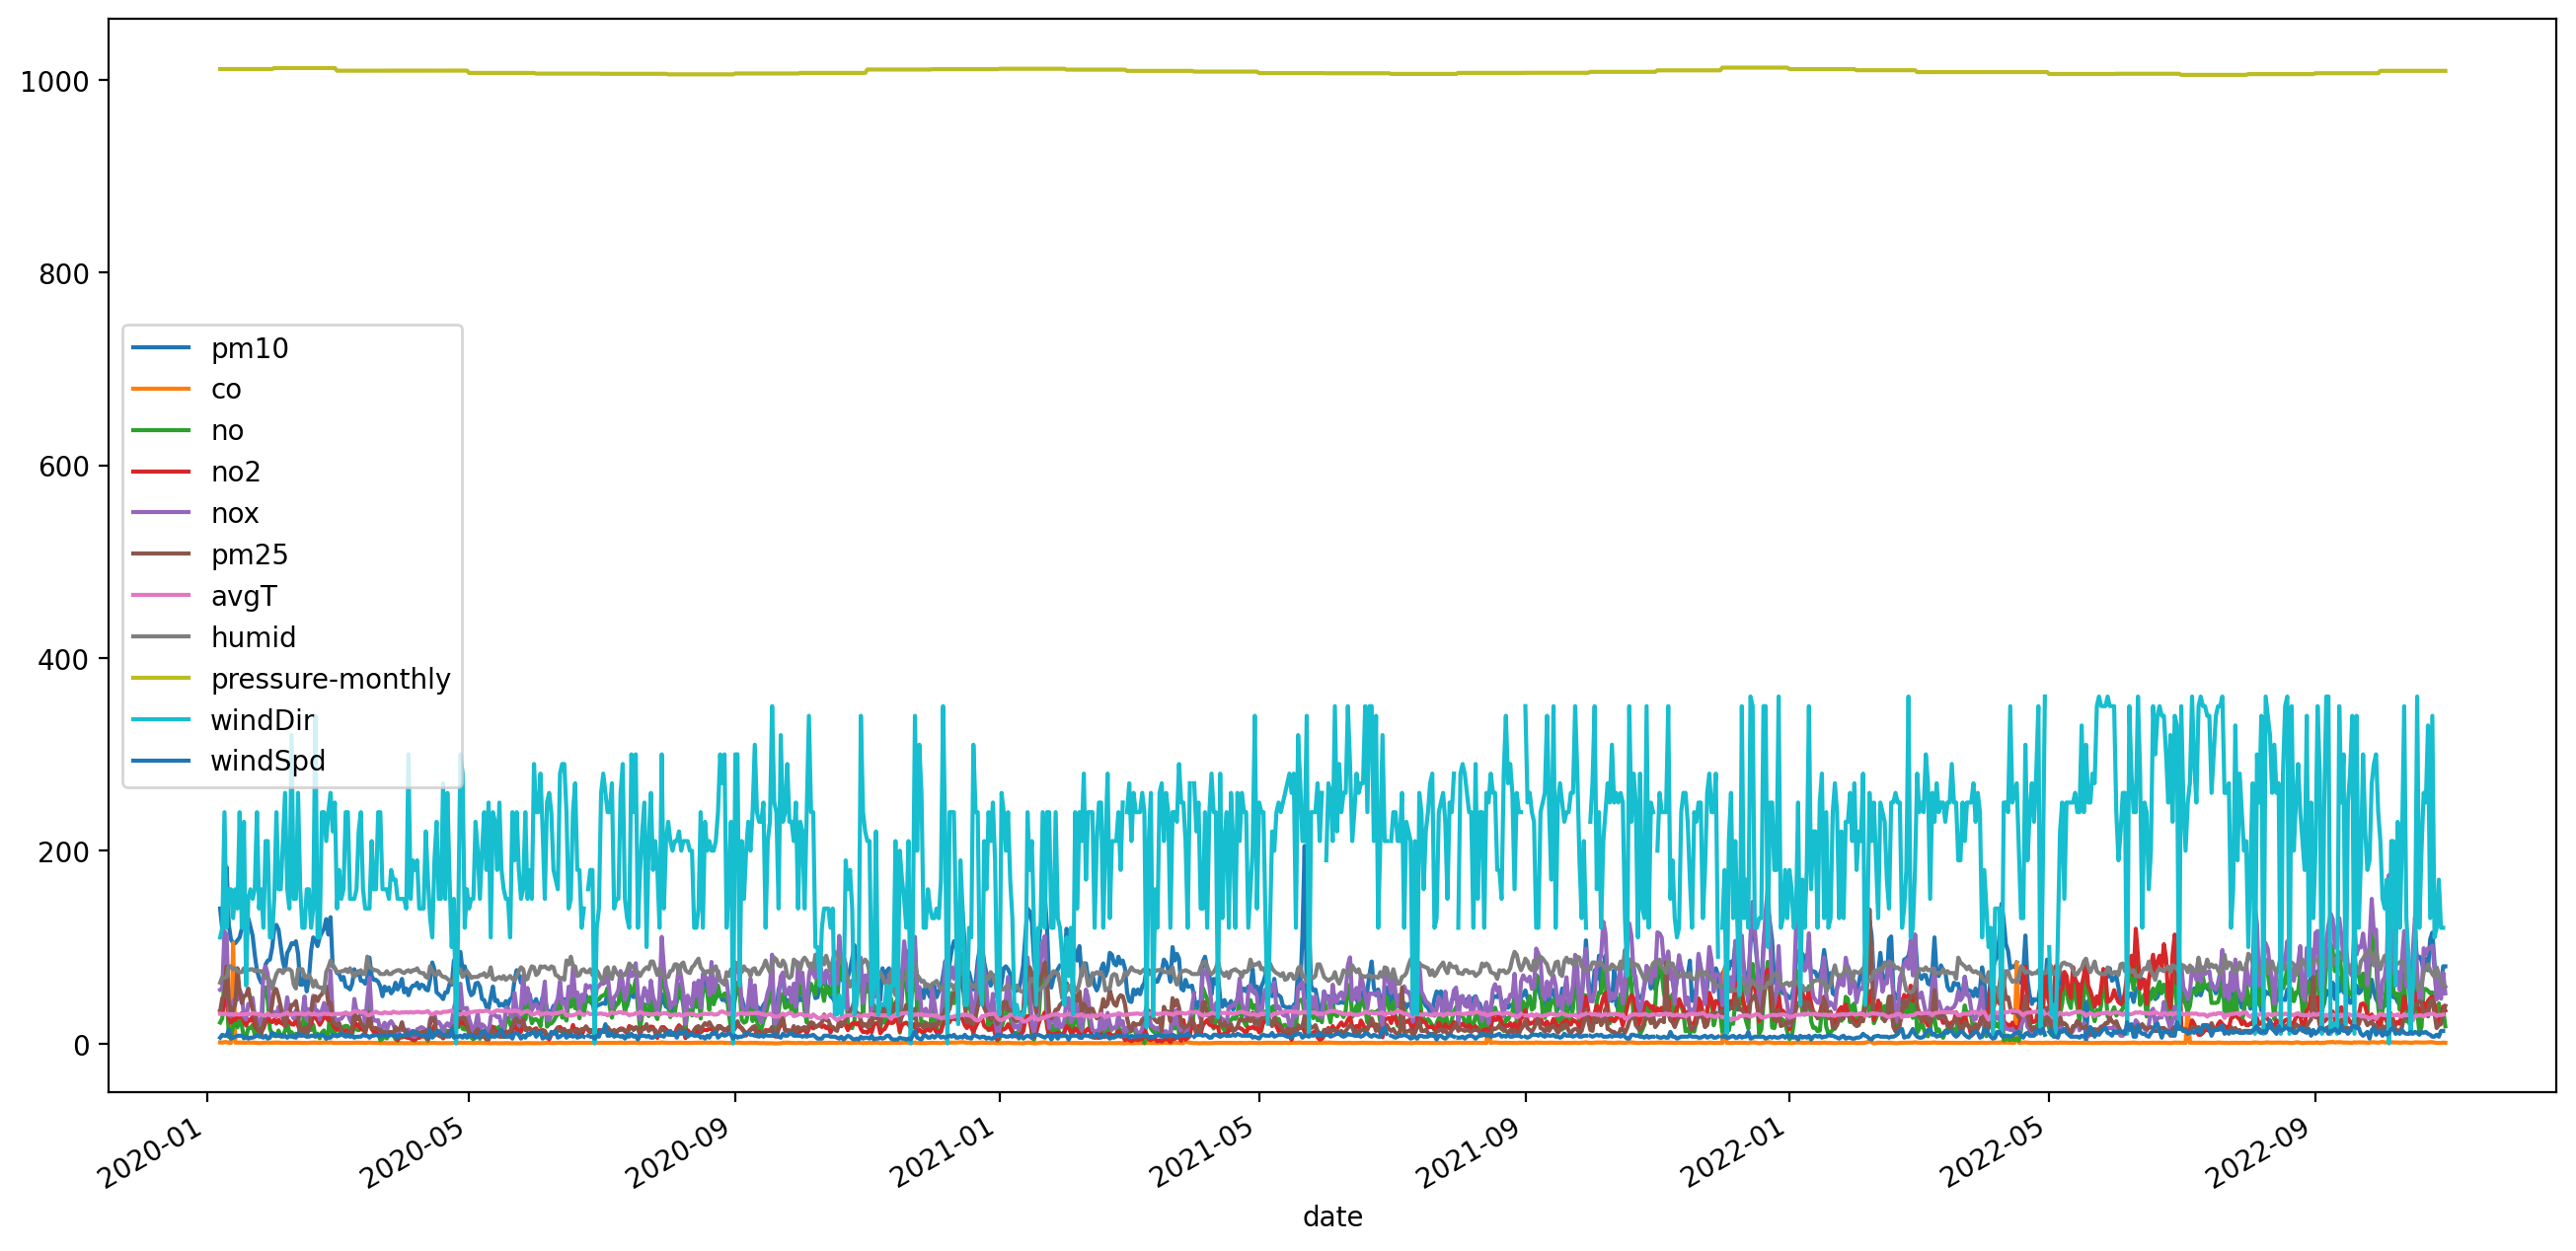

In [10]:
data.set_index('date').plot(figsize=(16, 8));

In [11]:
model=Prophet()

In [12]:
model.__dict__

{'growth': 'linear',
 'changepoints': None,
 'n_changepoints': 25,
 'specified_changepoints': False,
 'changepoint_range': 0.8,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'daily_seasonality': 'auto',
 'holidays': None,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'interval_width': 0.8,
 'uncertainty_samples': 1000,
 'start': None,
 'y_scale': None,
 'logistic_floor': False,
 't_scale': None,
 'changepoints_t': None,
 'seasonalities': OrderedDict(),
 'extra_regressors': OrderedDict(),
 'country_holidays': None,
 'stan_fit': None,
 'params': {},
 'history': None,
 'history_dates': None,
 'train_component_cols': None,
 'component_modes': None,
 'train_holiday_names': None,
 'fit_kwargs': {},
 'stan_backend': <prophet.models.CmdStanPyBackend at 0x7fdb506e0e80>}

In [13]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8say77z/0qvaauk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8say77z/4o_5bc1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6636', 'data', 'file=/tmp/tmpf8say77z/0qvaauk8.json', 'init=/tmp/tmpf8say77z/4o_5bc1p.json', 'output', 'file=/tmp/tmpf8say77z/prophet_modeld106gnim/prophet_model-20230405104922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:49:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:49:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
df.tail()

,ds,y
1760,2022-10-27,16.0
1761,2022-10-28,19.0
1762,2022-10-29,20.0
1763,2022-10-30,32.0
1764,2022-10-31,39.0


In [15]:
future = model.make_future_dataframe(periods=180, freq='D')
future.tail()

,ds
1203,2023-04-25
1204,2023-04-26
1205,2023-04-27
1206,2023-04-28
1207,2023-04-29


In [16]:
future.head()

,ds
0,2020-01-07
1,2020-01-08
2,2020-01-09
3,2020-01-10
4,2020-01-11


In [17]:
forecast = model.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-07,18.950843,20.234790,45.921308,18.950843,18.950843,14.089656,14.089656,14.089656,0.844703,0.844703,0.844703,13.244953,13.244953,13.244953,0.0,0.0,0.0,33.040499
1,2020-01-08,18.965817,21.676547,47.155134,18.965817,18.965817,15.309130,15.309130,15.309130,1.550555,1.550555,1.550555,13.758575,13.758575,13.758575,0.0,0.0,0.0,34.274947
2,2020-01-09,18.980791,21.471406,45.768840,18.980791,18.980791,14.455814,14.455814,14.455814,0.154936,0.154936,0.154936,14.300878,14.300878,14.300878,0.0,0.0,0.0,33.436605
3,2020-01-10,18.995765,21.110923,46.862055,18.995765,18.995765,14.719969,14.719969,14.719969,-0.139598,-0.139598,-0.139598,14.859567,14.859567,14.859567,0.0,0.0,0.0,33.715734
4,2020-01-11,19.010738,21.105355,46.366497,19.010738,19.010738,14.308313,14.308313,14.308313,-1.113551,-1.113551,-1.113551,15.421864,15.421864,15.421864,0.0,0.0,0.0,33.319051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,2023-04-25,30.586703,15.952934,41.060631,29.981345,31.214637,-1.572130,-1.572130,-1.572130,0.844703,0.844703,0.844703,-2.416834,-2.416834,-2.416834,0.0,0.0,0.0,29.014573
1204,2023-04-26,30.602083,16.103663,41.965367,29.989982,31.233755,-1.302562,-1.302562,-1.302562,1.550555,1.550555,1.550555,-2.853118,-2.853118,-2.853118,0.0,0.0,0.0,29.299521
1205,2023-04-27,30.617462,14.068661,41.455472,29.998122,31.253702,-3.113964,-3.113964,-3.113964,0.154936,0.154936,0.154936,-3.268900,-3.268900,-3.268900,0.0,0.0,0.0,27.503498
1206,2023-04-28,30.632842,14.115597,39.127297,30.005935,31.275697,-3.801290,-3.801290,-3.801290,-0.139598,-0.139598,-0.139598,-3.661692,-3.661692,-3.661692,0.0,0.0,0.0,26.831552


In [19]:
df

,ds,y
736,2020-01-07,33.0
737,2020-01-08,47.0
738,2020-01-09,49.0
739,2020-01-10,80.0
740,2020-01-11,43.0
...,...,...
1760,2022-10-27,16.0
1761,2022-10-28,19.0
1762,2022-10-29,20.0
1763,2022-10-30,32.0


In [20]:
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-07,33.040499,20.234790,45.921308
1,2020-01-08,34.274947,21.676547,47.155134
2,2020-01-09,33.436605,21.471406,45.768840
3,2020-01-10,33.715734,21.110923,46.862055
4,2020-01-11,33.319051,21.105355,46.366497
...,...,...,...,...
1203,2023-04-25,29.014573,15.952934,41.060631
1204,2023-04-26,29.299521,16.103663,41.965367
1205,2023-04-27,27.503498,14.068661,41.455472
1206,2023-04-28,26.831552,14.115597,39.127297


In [21]:
dt=pd.merge(df, dfcst, left_on='ds', right_on='ds')
dt

,ds,y,yhat,yhat_lower,yhat_upper
0,2020-01-07,33.0,33.040499,20.234790,45.921308
1,2020-01-08,47.0,34.274947,21.676547,47.155134
2,2020-01-09,49.0,33.436605,21.471406,45.768840
3,2020-01-10,80.0,33.715734,21.110923,46.862055
4,2020-01-11,43.0,33.319051,21.105355,46.366497
...,...,...,...,...,...
1023,2022-10-27,16.0,31.553928,18.466875,43.548809
1024,2022-10-28,19.0,31.740787,19.241287,43.490888
1025,2022-10-29,20.0,31.194491,18.548964,45.216585
1026,2022-10-30,32.0,30.887084,18.258097,43.036554


In [22]:
dt.shape

(1028, 5)

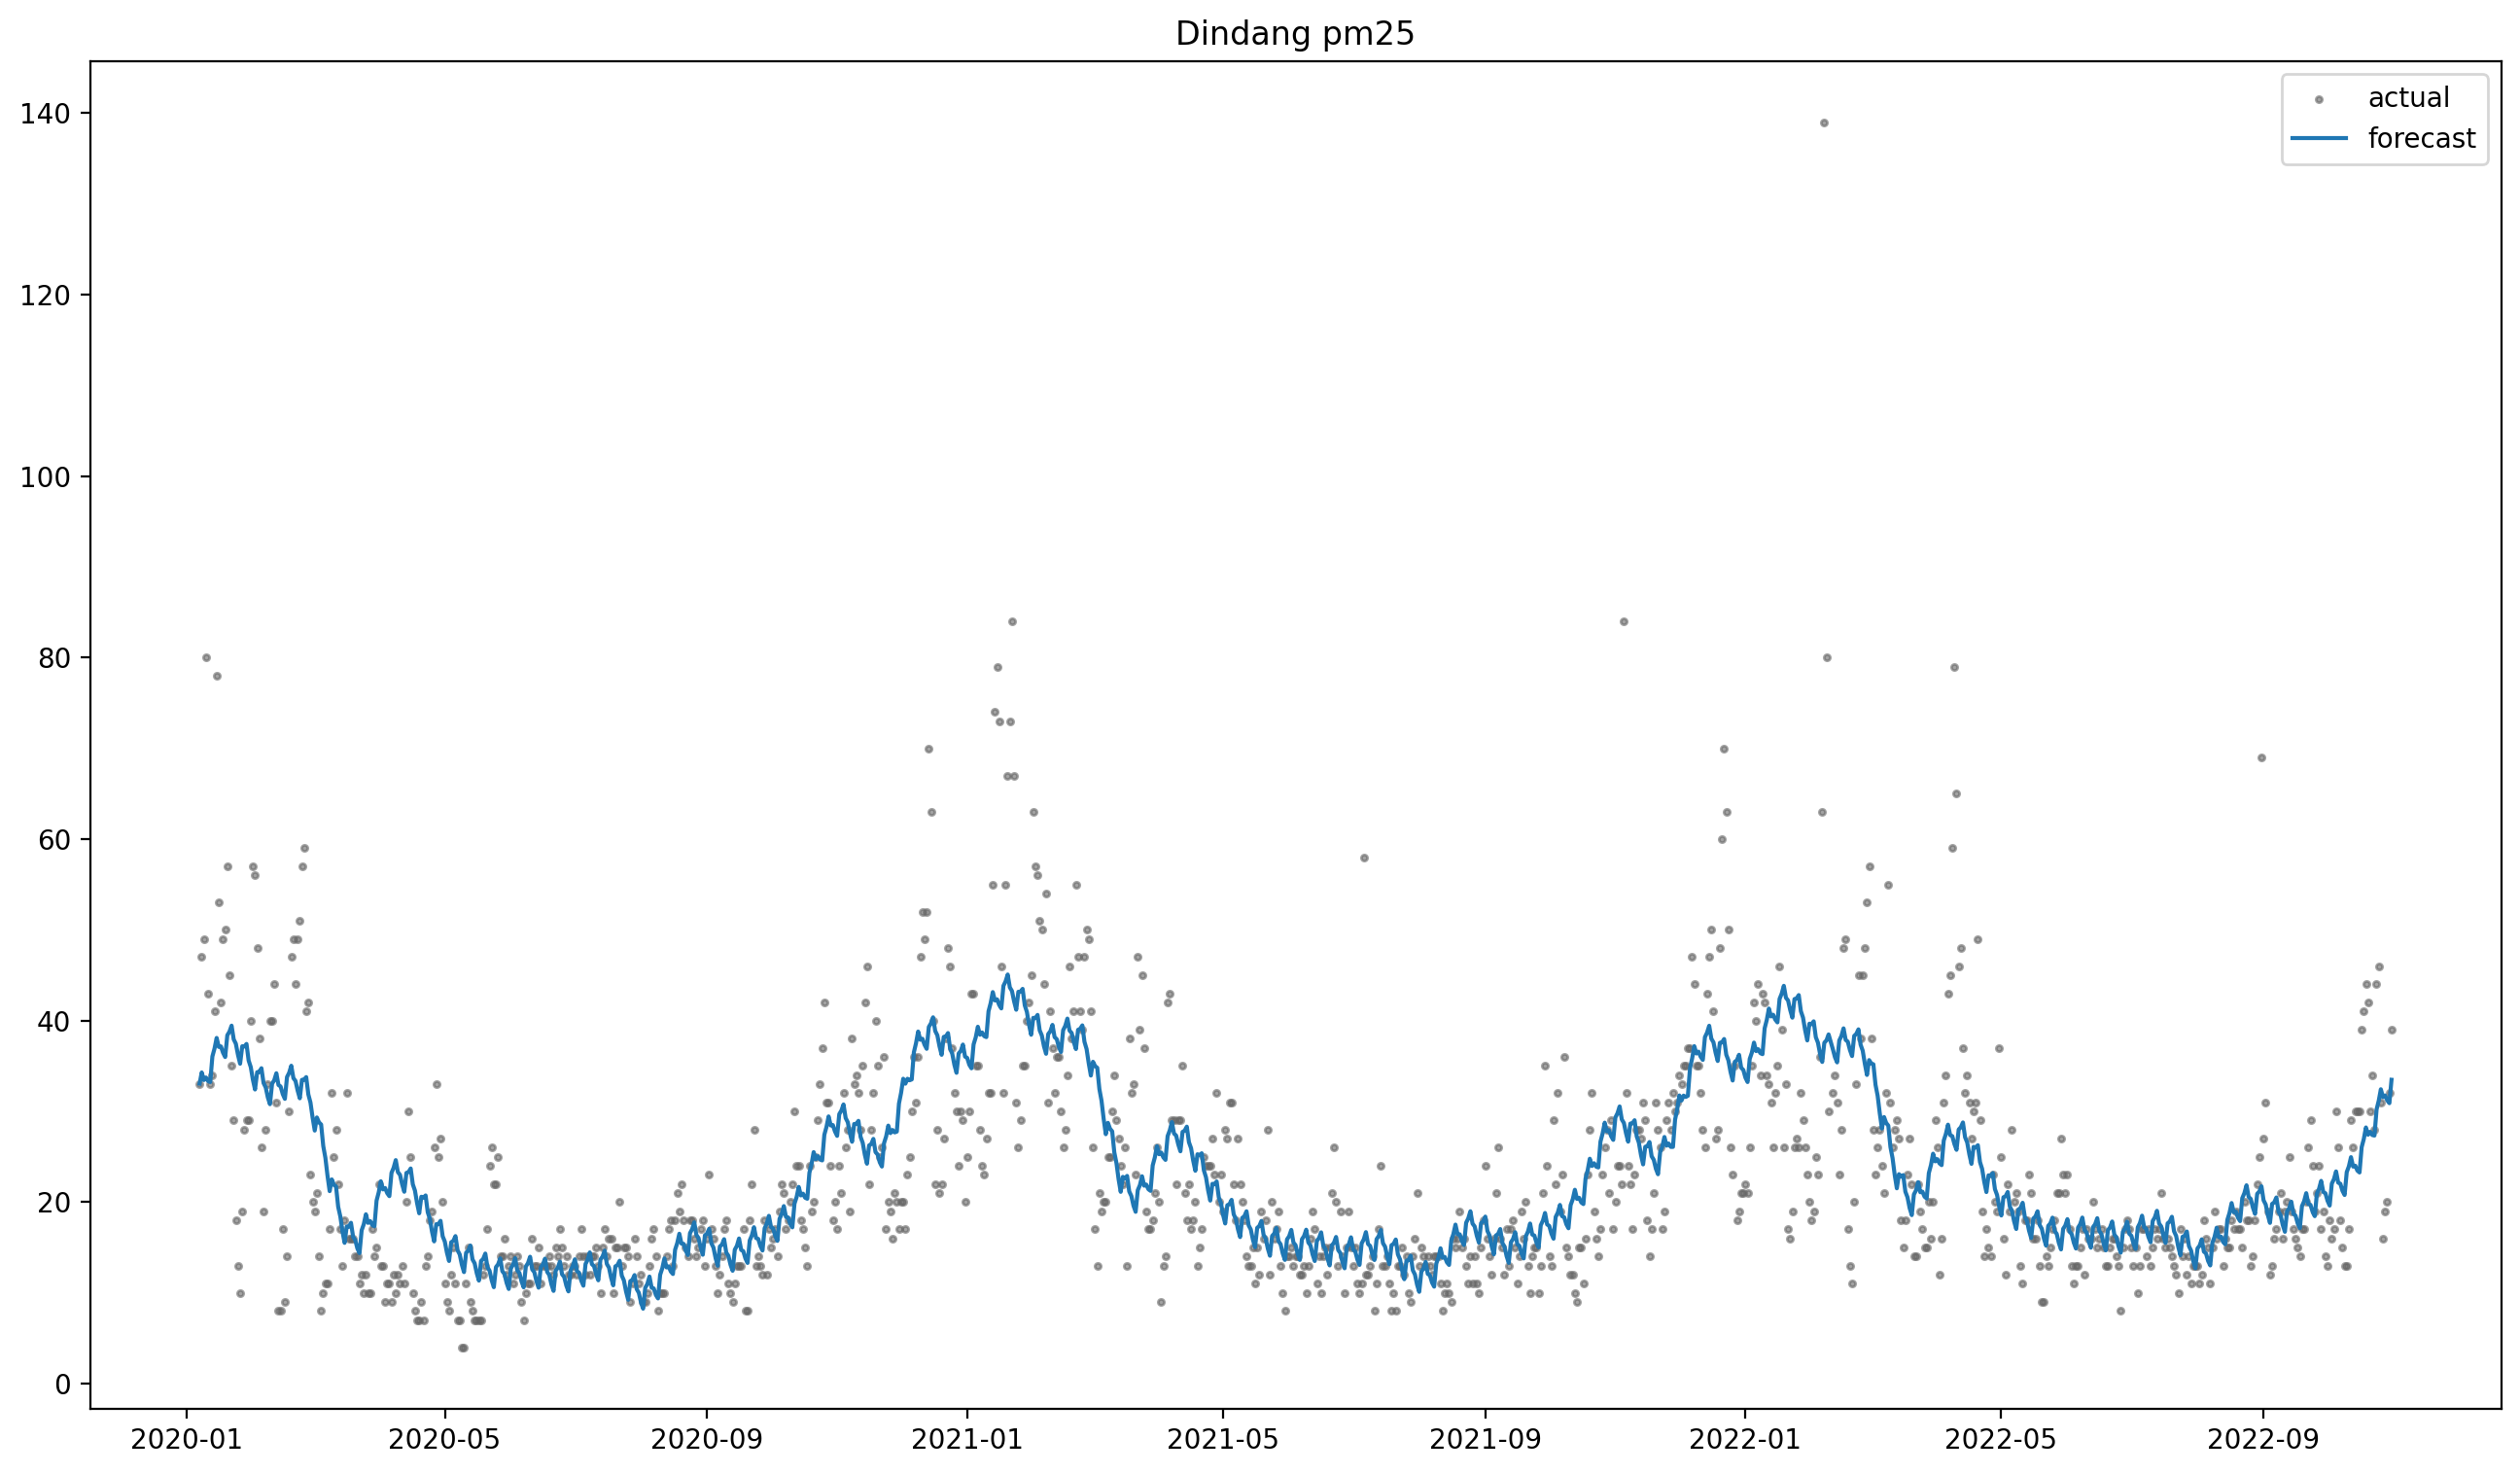

In [23]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title(f'Dindang {y_col}')
plt.legend();

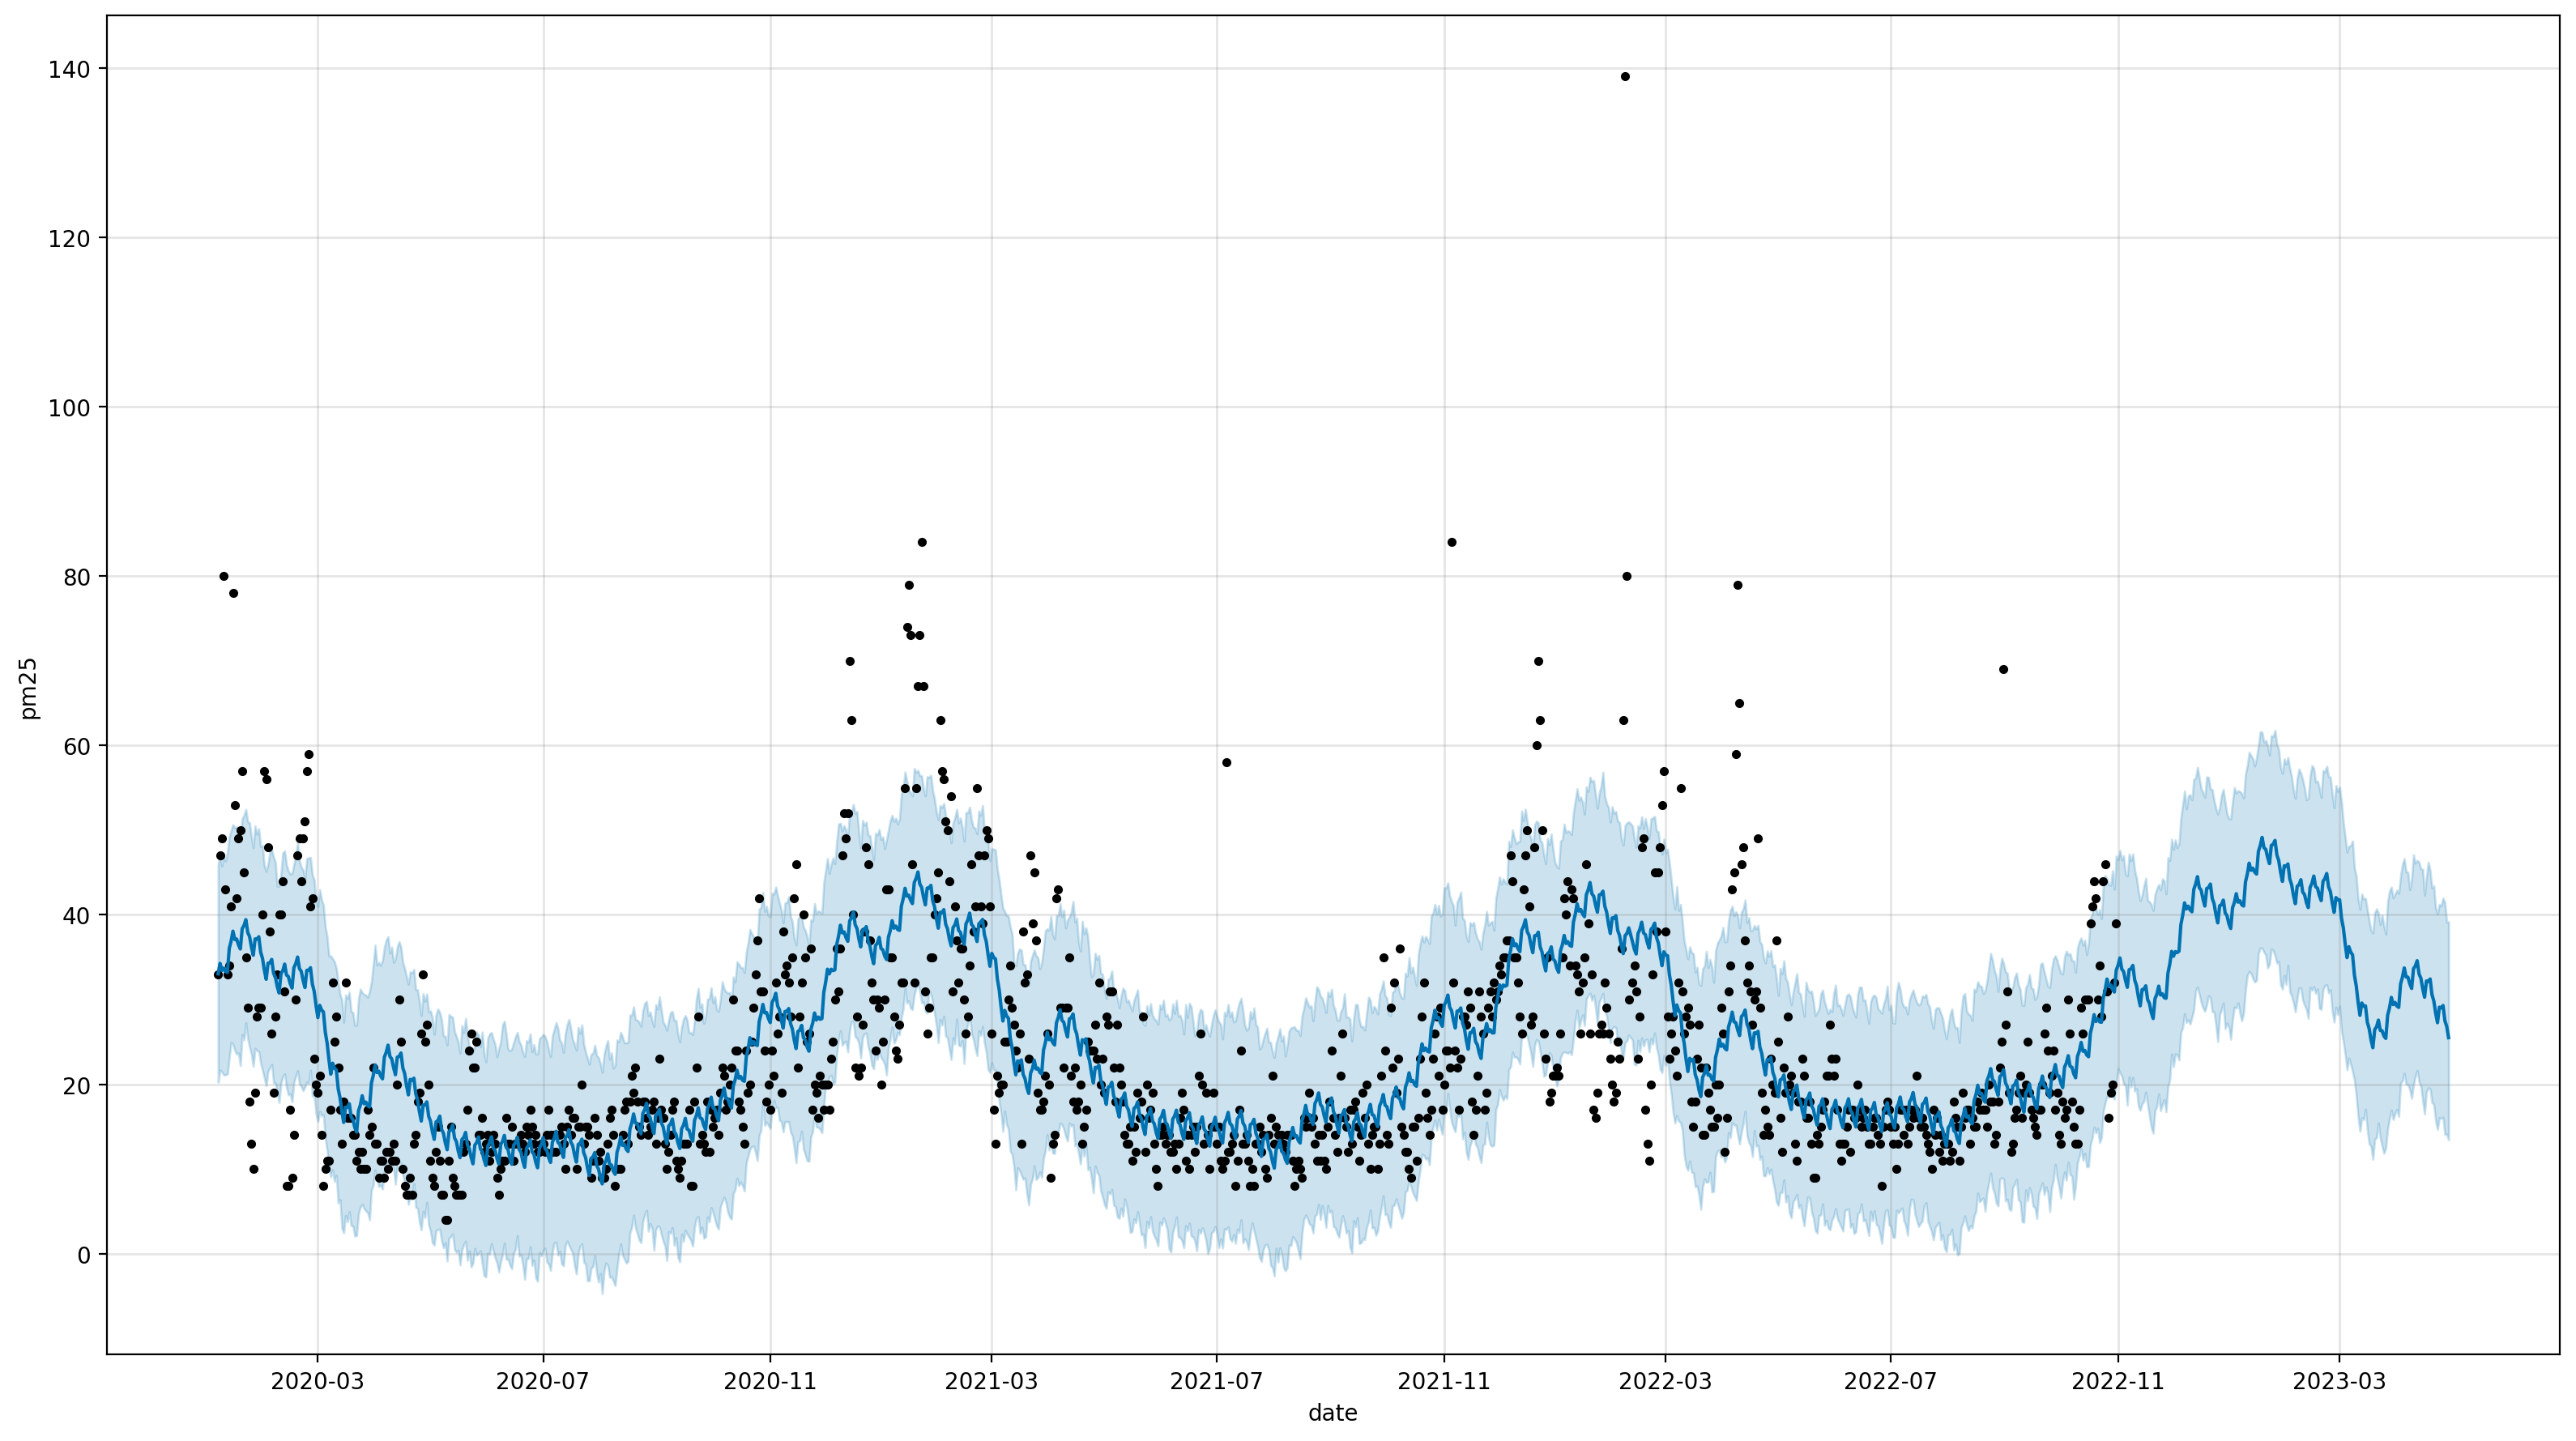

In [24]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date', ylabel=y_col)

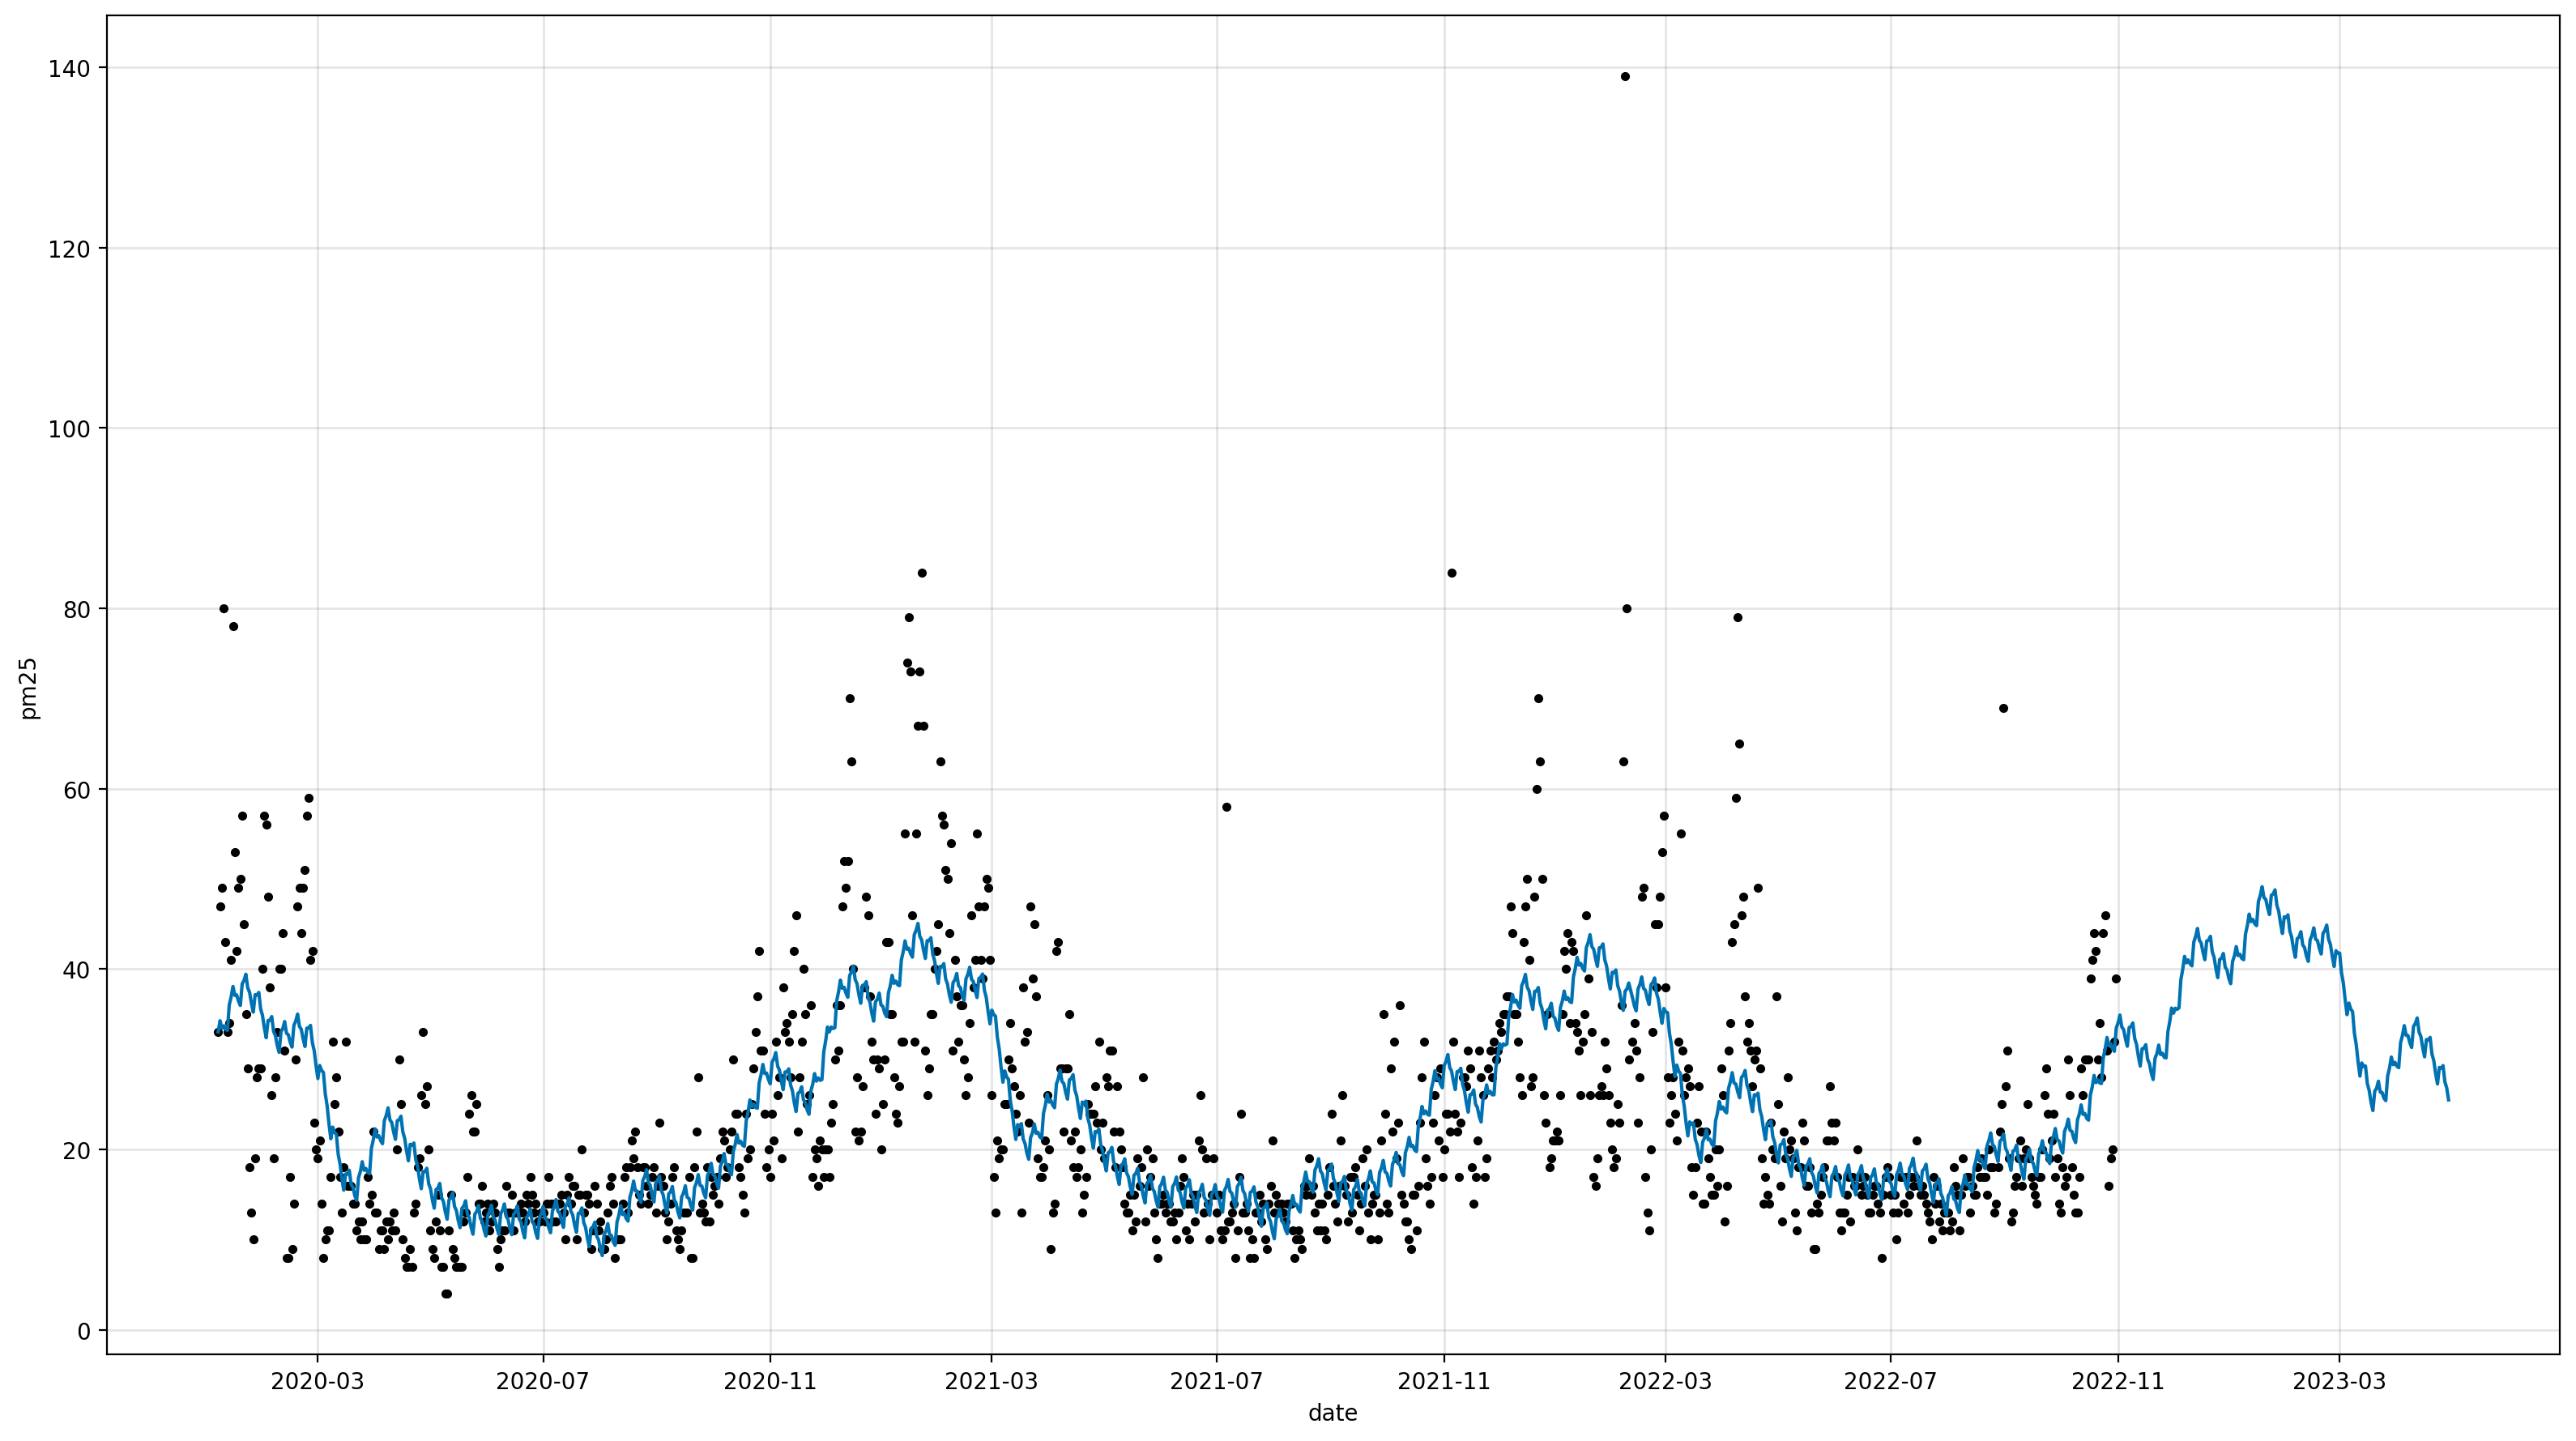

In [25]:
fig=model.plot(forecast, uncertainty=False, figsize=(16, 9), xlabel='date', ylabel=y_col)

In [26]:
dfcstnew = forecast.tail(180)

In [27]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'})
ypred

,ds,yhat
1028,2022-11-01,34.048623
1029,2022-11-02,34.909191
1030,2022-11-03,33.592823
1031,2022-11-04,33.302577
1032,2022-11-05,32.260270
...,...,...
1203,2023-04-25,29.014573
1204,2023-04-26,29.299521
1205,2023-04-27,27.503498
1206,2023-04-28,26.831552


In [28]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'}).round(0).head(7)
ypred

,ds,yhat
1028,2022-11-01,34.0
1029,2022-11-02,35.0
1030,2022-11-03,34.0
1031,2022-11-04,33.0
1032,2022-11-05,32.0
1033,2022-11-06,31.0
1034,2022-11-07,34.0


In [29]:
ypred.mean().round(0)

<ipython-input-29-2ab64095c772>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ypred.mean().round(0)


yhat    33.0
dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [31]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [32]:
r2_score(metric_df.y, metric_df.yhat) #score

0.4553564946910088

In [33]:
mse = mean_squared_error(metric_df.y, metric_df.yhat) #mse
mse

100.29266155887744

In [34]:
import math
#mse = np.square(np.subtract(metric_df.y,metric_df.yhat)).mean() 
mse = mean_squared_error(metric_df.y, metric_df.yhat)
ans = math.sqrt(mse) 
ans

10.014622387233452